In [ ]:
!python -m pip install --upgrade pip

In [1]:
!pip install wordcloud
!pip install certifi --ignore-installed

  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)


In [ ]:
!pip install jieba

In [10]:
!pip install googletrans

In [3]:
!mkdir jieba_data

子目錄或檔案 jieba_data 已經存在。


In [4]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -o jieba_data/dict.txt.big

'wget' 不是內部或外部命令、可執行的程式或批次檔。


In [52]:
jieba.set_dictionary('jieba_data/dict.txt.big')

Exception: jieba: file does not exist: C:\Users\Big data\PycharmProjects\NLP\jieba_data\dict.txt.big

In [53]:
import time

In [12]:
import googletrans

In [13]:
from pprint import pprint

In [14]:
pprint(googletrans.LANGCODES) 

{'afrikaans': 'af',
 'albanian': 'sq',
 'amharic': 'am',
 'arabic': 'ar',
 'armenian': 'hy',
 'azerbaijani': 'az',
 'basque': 'eu',
 'belarusian': 'be',
 'bengali': 'bn',
 'bosnian': 'bs',
 'bulgarian': 'bg',
 'catalan': 'ca',
 'cebuano': 'ceb',
 'chichewa': 'ny',
 'chinese (simplified)': 'zh-cn',
 'chinese (traditional)': 'zh-tw',
 'corsican': 'co',
 'croatian': 'hr',
 'czech': 'cs',
 'danish': 'da',
 'dutch': 'nl',
 'english': 'en',
 'esperanto': 'eo',
 'estonian': 'et',
 'filipino': 'tl',
 'finnish': 'fi',
 'french': 'fr',
 'frisian': 'fy',
 'galician': 'gl',
 'georgian': 'ka',
 'german': 'de',
 'greek': 'el',
 'gujarati': 'gu',
 'haitian creole': 'ht',
 'hausa': 'ha',
 'hawaiian': 'haw',
 'hebrew': 'he',
 'hindi': 'hi',
 'hmong': 'hmn',
 'hungarian': 'hu',
 'icelandic': 'is',
 'igbo': 'ig',
 'indonesian': 'id',
 'irish': 'ga',
 'italian': 'it',
 'japanese': 'ja',
 'javanese': 'jw',
 'kannada': 'kn',
 'kazakh': 'kk',
 'khmer': 'km',
 'korean': 'ko',
 'kurdish (kurmanji)': 'ku',
 'ky

In [17]:
import random

In [18]:
from wordcloud import WordCloud

In [19]:
import matplotlib.pyplot as plt

In [20]:
from PIL import Image

In [21]:
%matplotlib inline

In [22]:
import pymongo

In [23]:
import pandas as pd

In [24]:
import jieba

In [25]:
import re

In [26]:
import numpy as np

In [27]:
from collections import Counter

In [28]:
client = pymongo.MongoClient('192.168.158.128', 27017)

In [29]:
db = client.tibame

In [30]:
collection = db.recipe_raw

In [31]:
data = pd.DataFrame(list(collection.find()))
data

_id  \
0      5f58abb2226b5c697d13c9ad   
1      5f58abbd226b5c697d13c9ae   
2      5f58abc9226b5c697d13c9af   
3      5f58abd6226b5c697d13c9b0   
4      5f58abe3226b5c697d13c9b1   
...                         ...   
58387  5f5d02028d34caa18ae078b3   
58388  5f5d02028d34caa18ae078b4   
58389  5f5d02028d34caa18ae078b5   
58390  5f5d02028d34caa18ae078b6   
58391  5f5d02028d34caa18ae078b7   

                                                     url  \
0      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1358...   
1      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1354...   
2      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1351...   
3      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1232...   
4      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1205...   
...                                                  ...   
58387                     https://icook.tw/recipes/16113   
58388                     https://icook.tw/recipes/15507   
58389                     https://icook.tw/recipes/15080   
58390                     https://icook.tw/recipes/15063   
58391                     https://icook.tw/recipes/15062   

                        title               time           author  \
0                    健身人 雞胸肉丼  2020年09月06日 10:29             Fish   
1                      健身人的餐點  2020年09月01日 13:57            兒子的媽媽   
2                       健身人餐點  2020年08月28日 13:46            兒子的媽媽   
3          健身餐盤 - 奶油香蒜雞胸肉佐馬鈴薯  2020年04月29日 09:53         Holly Lu   
4               低醣健身料理-雞胸肉捲蔬菜  2020年04月10日 12:06  Wonda‘s｜窮遊女子的灶咖   
...                       ...                ...              ...   
58387        ㄚ曼達的廚房~紙包鮭魚(氣炸鍋)         2015-09-26      I LOVE COOK   
58388                  九層塔炒蛤礪         2015-09-26      I LOVE COOK   
58389                  破布子蒸鱈魚         2015-09-26      I LOVE COOK   
58390         ♥我的手作料理♥ 泰式檸檬蒸魚         2015-09-26      I LOVE COOK   
58391  品靚上菜-萬用沾醬(蔬菜肉海鮮連水餃都搭啦)         2015-09-26      I LOVE COOK   

                                              ingredient  \
0        橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,   
1                     雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,   
2                  雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,   
3      雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適...   
4           半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,   
...                                                  ...   
58387  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   
58388  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   
58389  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   
58390  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   
58391  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   

                                                   steps  \
0      雞胸肉切丁（好入口的大小）|雞胸肉煎至兩面金黃 盛出備用|橄欖油低溫炒出紅蘿蔔素|加入高麗菜...   
1      先將雞肉剁碎 加入豆腐 及調味料攪拌|煮一鍋水燙青菜|鍋子放油。將攪拌好的豆腐雞肉 用成圓圓...   
2      雞胸肉-切丁 熱鍋先炒洋蔥在下雞肉，用一點醬油調味|熱鍋炒空心菜和雪白菇 ，用一點鹽巴調味|...   
3      雞胸肉完全退冰切成小塊，撒適量胡椒鹽、蒜頭、鹽巴、肉桂粉、羅勒葉，醃漬15分鐘以上|馬鈴薯及...   
4      ｜備料｜\n1. 把小黃瓜、紅蘿蔔切成條狀\n（可先燙過，加快等下煎的速度）\n2. 雞胸肉...   
...                                                  ...   
58387  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   
58388  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   
58389  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   
58390  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   
58391  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   

                                                 comment category  
0                                                 #今天吃這道       健身  
1                                             健身也是要吃飽飽的喔       健身  
2                                                              健身  
3              減醣、健身族看過來，懶人料理上菜囉🥰 #金廚獎 #健身 #雞胸肉 #馬鈴薯 #減醣       健身  
4      煎雞胸肉吃膩了，突然想到來試試看包蔬菜，但其實有點小失敗，跟大家分享做這道料理時要特別注意的...       健身  
...                                                  ...      ...  
58387                                      \n雲吞配合麵  一流\n       海鮮  
58388                                      \n雲吞配合麵  一流\n       海鮮  
583

In [160]:
pd_ing = data['ingredient']

In [44]:
list_ing = []
for i in data['ingredient']:
    list_ing.append(i)
list_ing

['橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,',
 '雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,',
 '雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,',
 '雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適量,肉桂粉適量,羅勒葉適量,',
 '半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,',
 '雞胸肉 半付,紅蘿蔔 半根,菜脯 一大匙,雞蛋 兩顆,鹽巴 少許,白胡椒粉 少許,牛奶 約一匙,',
 '蛋白糊,蛋白 4 顆,鹽巴1咪咪,赤藻醣 60 克,檸檬汁 5 克,蛋黃糊,蛋黃 4 顆,高蛋白粉50克,巧克力95% 100 克,椰子油 50 克,可可粉 15 克,動鮮 60 克,吋烤模 1個 6,',
 '西洋芹3片,雞里肌肉一盤,紅蘿蔔半根,小馬鈴薯兩顆,',
 '雞胸肉片1盤,蒜頭3瓣切末,小牛番茄2個,小杏鮑菇2支,鹽巴適量,芹菜末少許,羅勒香料少許,',
 '虱目魚柳1盤,雞蛋1顆,少許麵粉,胡椒鹽適量,',
 '雞胸肉兩片,起司一把,胡椒鹽,紅蔥頭兩顆,',
 '雞胸肉2塊（需完全退冰）,珍珠馬鈴薯4-6顆,四季豆一把,洋蔥半顆,里肌培根一份,橄欖油,起司絲適量,胡椒鹽,鮮蒜末一把,迷迭香香料,蒜粉,紅椒粉,',
 '一盤雞胸,一把糯米椒,一顆馬鈴薯,紅椒粉少許,鹽巴少許,迷迭香少許,',
 '酪梨 1 顆,半熟雞蛋 1 顆,柚香檸檬沙拉醬 些許,黑胡椒 些許,迷迭香 些許,麵包/吐司,',
 '雞胸肉 200 克,嫩豆腐 1/2 盒,牛番茄 1 顆,無糖豆漿 500 cc,味噌 70 克,海帶芽 少許,蔥末 適量,白胡椒粉 適量,',
 '雞胸肉 1附,鹽巴 些許,黑胡椒 些許,',
 '預備食材,蛋 一個,全麥冷凍鬆餅 一個,莎莎醬 一大匙,橄欖油 適量,',
 '絲瓜 1 條,大陸妹 1 份,花椰菜 適量,雞胸肉 1/2附,鴻禧菇 1 包,木耳 適量,調味料 適量,蝦米、乾香菇 適量,五穀米 3/4 杯,',
 '雞蛋4-5顆 (小顆的蛋請用5顆，第5顆取蛋白就好),希臘優格2大匙,鹽 適量,胡椒 適量,手做藜麥吐司 4 片,',
 '食材,高麗菜 1

In [32]:
list_steps = []
for i in data['steps']:
    list_steps.append(i)
list_steps

['雞胸肉切丁（好入口的大小）|雞胸肉煎至兩面金黃 盛出備用|橄欖油低溫炒出紅蘿蔔素|加入高麗菜拌炒至喜歡的硬度|加入調味料小火滾一分鐘|加入雞胸肉拌炒|將料理放到煮熟的五穀飯上|鋪上炒蛋 蔬菜|完成！|',
 '先將雞肉剁碎 加入豆腐 及調味料攪拌|煮一鍋水燙青菜|鍋子放油。將攪拌好的豆腐雞肉 用成圓圓的 下鍋後慢慢壓扁。煎到兩面金黃色 即可|擺盤。完工！|',
 '雞胸肉-切丁 熱鍋先炒洋蔥在下雞肉，用一點醬油調味|熱鍋炒空心菜和雪白菇 ，用一點鹽巴調味|熱鍋炒雞蛋，用一點雞粉調味|擺盤，完工！|',
 '雞胸肉完全退冰切成小塊，撒適量胡椒鹽、蒜頭、鹽巴、肉桂粉、羅勒葉，醃漬15分鐘以上|馬鈴薯及紅蘿蔔切塊，1杯水用電鍋蒸熟|食材放上奶油，補撒少許鹽巴。120度預熱烤箱10分鐘，接著再送入烤箱以150度烤25分鐘。|註：奶油是增添風味，放的量就看個人喜好|',
 '｜備料｜\n1. 把小黃瓜、紅蘿蔔切成條狀\n（可先燙過，加快等下煎的速度）\n2. 雞胸肉切成薄片，再切成條狀\n（這裏要切的越薄越好，待會才會比較好包，不然會很容易散開！圖片中有些我都切的太厚了TAT請以比圖片中的薄為目標）|在雞胸肉上抹鹽醃一下，此舉除了可以讓它有味道，也可以讓它煎起來比較嫩喔！（醃5-10分鐘即可）|依照雞胸肉的大小包入適量的小黃瓜和紅蘿蔔（可讓頭尾露出，顏色比較漂亮）|捲起\n［註］：圖片中間兩個的厚度是比較恰當的，最左兩塊明顯太厚（錯誤示範）|將肉捲下鍋煎熟（油可以比圖片中的再少一點）|蓋上鍋蓋煎比較容易熟，一面煎個3-4分鐘後開蓋，翻面再煎2-3分鐘即可。|因為肉切太厚很多個肉捲都散開了⋯大家要記得切薄一點！鹽醃法讓雞胸肉不乾柴，搭配小黃瓜更多汁～～|',
 '｜備料｜\n1. 紅蘿蔔切丁\n2. 雞胸肉切丁\n3. 菜脯可先泡水，避免太鹹|起油鍋，先炒紅蘿蔔，再接著加入瀝乾的菜脯|加入雞胸肉略為拌炒後，起鍋前加入少許白胡椒粉|炒至雞胸肉半熟（如圖）即可起鍋|準備另一個碗，打入兩顆蛋，加少許鹽巴拌勻|加入牛奶攪拌均勻|倒入剛剛的雞胸肉蔬菜中|放入電鍋，外鍋加一杯水，蒸至跳起再悶10分鐘即可。（蒸蛋時電鍋鍋蓋可留空隙，避免蒸氣流入蒸蛋表面。此舉可以讓蒸蛋更平滑！）|成果好看又好吃！裡面的蔬菜也可換成玉米等其他蔬菜喔～～|',
 '將鮮奶油 椰子油，可可粉，放入鍋中中小火加熱

# Data Merge

In [50]:
list_ing_merge = ''.join(str(list_ing[:2000]))
print(type(list_ing_merge))
list_ing_merge

<class 'str'>


"['橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,', '雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,', '雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,', '雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適量,肉桂粉適量,羅勒葉適量,', '半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,', '雞胸肉 半付,紅蘿蔔 半根,菜脯 一大匙,雞蛋 兩顆,鹽巴 少許,白胡椒粉 少許,牛奶 約一匙,', '蛋白糊,蛋白 4 顆,鹽巴1咪咪,赤藻醣 60 克,檸檬汁 5 克,蛋黃糊,蛋黃 4 顆,高蛋白粉50克,巧克力95% 100 克,椰子油 50 克,可可粉 15 克,動鮮 60 克,吋烤模 1個 6,', '西洋芹3片,雞里肌肉一盤,紅蘿蔔半根,小馬鈴薯兩顆,', '雞胸肉片1盤,蒜頭3瓣切末,小牛番茄2個,小杏鮑菇2支,鹽巴適量,芹菜末少許,羅勒香料少許,', '虱目魚柳1盤,雞蛋1顆,少許麵粉,胡椒鹽適量,', '雞胸肉兩片,起司一把,胡椒鹽,紅蔥頭兩顆,', '雞胸肉2塊（需完全退冰）,珍珠馬鈴薯4-6顆,四季豆一把,洋蔥半顆,里肌培根一份,橄欖油,起司絲適量,胡椒鹽,鮮蒜末一把,迷迭香香料,蒜粉,紅椒粉,', '一盤雞胸,一把糯米椒,一顆馬鈴薯,紅椒粉少許,鹽巴少許,迷迭香少許,', '酪梨 1 顆,半熟雞蛋 1 顆,柚香檸檬沙拉醬 些許,黑胡椒 些許,迷迭香 些許,麵包/吐司,', '雞胸肉 200 克,嫩豆腐 1/2 盒,牛番茄 1 顆,無糖豆漿 500 cc,味噌 70 克,海帶芽 少許,蔥末 適量,白胡椒粉 適量,', '雞胸肉 1附,鹽巴 些許,黑胡椒 些許,', '預備食材,蛋 一個,全麥冷凍鬆餅 一個,莎莎醬 一大匙,橄欖油 適量,', '絲瓜 1 條,大陸妹 1 份,花椰菜 適量,雞胸肉 1/2附,鴻禧菇 1 包,木耳 適量,調味料 適量,蝦米、乾香菇 適量,五穀米 3/4 杯,', '雞蛋4-5顆 (小顆的蛋請用5顆，第5顆取蛋白就好),希臘優格2大匙,鹽 適量,胡椒 適量,手做藜麥吐司 4 片,', '食材,高麗菜 1/4 顆,花椰菜 1/2 顆,紅籮蔔

In [38]:
list_steps_merge = ''.join(str(list_steps[:2000]))
print(type(list_steps_merge))
list_steps_merge

<class 'str'>


'[\'雞胸肉切丁（好入口的大小）|雞胸肉煎至兩面金黃 盛出備用|橄欖油低溫炒出紅蘿蔔素|加入高麗菜拌炒至喜歡的硬度|加入調味料小火滾一分鐘|加入雞胸肉拌炒|將料理放到煮熟的五穀飯上|鋪上炒蛋 蔬菜|完成！|\', \'先將雞肉剁碎 加入豆腐 及調味料攪拌|煮一鍋水燙青菜|鍋子放油。將攪拌好的豆腐雞肉 用成圓圓的 下鍋後慢慢壓扁。煎到兩面金黃色 即可|擺盤。完工！|\', \'雞胸肉-切丁 熱鍋先炒洋蔥在下雞肉，用一點醬油調味|熱鍋炒空心菜和雪白菇 ，用一點鹽巴調味|熱鍋炒雞蛋，用一點雞粉調味|擺盤，完工！|\', \'雞胸肉完全退冰切成小塊，撒適量胡椒鹽、蒜頭、鹽巴、肉桂粉、羅勒葉，醃漬15分鐘以上|馬鈴薯及紅蘿蔔切塊，1杯水用電鍋蒸熟|食材放上奶油，補撒少許鹽巴。120度預熱烤箱10分鐘，接著再送入烤箱以150度烤25分鐘。|註：奶油是增添風味，放的量就看個人喜好|\', \'｜備料｜\\n1. 把小黃瓜、紅蘿蔔切成條狀\\n（可先燙過，加快等下煎的速度）\\n2. 雞胸肉切成薄片，再切成條狀\\n（這裏要切的越薄越好，待會才會比較好包，不然會很容易散開！圖片中有些我都切的太厚了TAT請以比圖片中的薄為目標）|在雞胸肉上抹鹽醃一下，此舉除了可以讓它有味道，也可以讓它煎起來比較嫩喔！（醃5-10分鐘即可）|依照雞胸肉的大小包入適量的小黃瓜和紅蘿蔔（可讓頭尾露出，顏色比較漂亮）|捲起\\n［註］：圖片中間兩個的厚度是比較恰當的，最左兩塊明顯太厚（錯誤示範）|將肉捲下鍋煎熟（油可以比圖片中的再少一點）|蓋上鍋蓋煎比較容易熟，一面煎個3-4分鐘後開蓋，翻面再煎2-3分鐘即可。|因為肉切太厚很多個肉捲都散開了⋯大家要記得切薄一點！鹽醃法讓雞胸肉不乾柴，搭配小黃瓜更多汁～～|\', \'｜備料｜\\n1. 紅蘿蔔切丁\\n2. 雞胸肉切丁\\n3. 菜脯可先泡水，避免太鹹|起油鍋，先炒紅蘿蔔，再接著加入瀝乾的菜脯|加入雞胸肉略為拌炒後，起鍋前加入少許白胡椒粉|炒至雞胸肉半熟（如圖）即可起鍋|準備另一個碗，打入兩顆蛋，加少許鹽巴拌勻|加入牛奶攪拌均勻|倒入剛剛的雞胸肉蔬菜中|放入電鍋，外鍋加一杯水，蒸至跳起再悶10分鐘即可。（蒸蛋時電鍋鍋蓋可留空隙，避免蒸氣流入蒸蛋表面。此舉可以讓蒸蛋更平滑！）|成果好看又好吃！裡面的蔬菜也可換成玉米等其他蔬菜喔～～|\', \'將鮮奶油 椰

# 中轉英

In [34]:
translator = googletrans.Translator()

In [39]:
results = translator.translate('我覺得今天天氣很差')
print(results)
print(results.text)

Translated(src=zh-CN, dest=en, text=I think the weather is bad today, pronunciation=None, extra_data="{'translat...")
I think the weather is bad today


('橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,',
 '雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,',
 '雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,',
 '雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適量,肉桂粉適量,羅勒葉適量,',
 '半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,',
 '雞胸肉 半付,紅蘿蔔 半根,菜脯 一大匙,雞蛋 兩顆,鹽巴 少許,白胡椒粉 少許,牛奶 約一匙,',
 '蛋白糊,蛋白 4 顆,鹽巴1咪咪,赤藻醣 60 克,檸檬汁 5 克,蛋黃糊,蛋黃 4 顆,高蛋白粉50克,巧克力95% 100 克,椰子油 50 克,可可粉 15 克,動鮮 60 克,吋烤模 1個 6,',
 '西洋芹3片,雞里肌肉一盤,紅蘿蔔半根,小馬鈴薯兩顆,',
 '雞胸肉片1盤,蒜頭3瓣切末,小牛番茄2個,小杏鮑菇2支,鹽巴適量,芹菜末少許,羅勒香料少許,',
 '虱目魚柳1盤,雞蛋1顆,少許麵粉,胡椒鹽適量,',
 '雞胸肉兩片,起司一把,胡椒鹽,紅蔥頭兩顆,',
 '雞胸肉2塊（需完全退冰）,珍珠馬鈴薯4-6顆,四季豆一把,洋蔥半顆,里肌培根一份,橄欖油,起司絲適量,胡椒鹽,鮮蒜末一把,迷迭香香料,蒜粉,紅椒粉,',
 '一盤雞胸,一把糯米椒,一顆馬鈴薯,紅椒粉少許,鹽巴少許,迷迭香少許,',
 '酪梨 1 顆,半熟雞蛋 1 顆,柚香檸檬沙拉醬 些許,黑胡椒 些許,迷迭香 些許,麵包/吐司,',
 '雞胸肉 200 克,嫩豆腐 1/2 盒,牛番茄 1 顆,無糖豆漿 500 cc,味噌 70 克,海帶芽 少許,蔥末 適量,白胡椒粉 適量,',
 '雞胸肉 1附,鹽巴 些許,黑胡椒 些許,',
 '預備食材,蛋 一個,全麥冷凍鬆餅 一個,莎莎醬 一大匙,橄欖油 適量,',
 '絲瓜 1 條,大陸妹 1 份,花椰菜 適量,雞胸肉 1/2附,鴻禧菇 1 包,木耳 適量,調味料 適量,蝦米、乾香菇 適量,五穀米 3/4 杯,',
 '雞蛋4-5顆 (小顆的蛋請用5顆，第5顆取蛋白就好),希臘優格2大匙,鹽 適量,胡椒 適量,手做藜麥吐司 4 片,',
 '食材,高麗菜 1

'雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,'

In [63]:
tra_list_ing = []
item = 1
for i in list_ing[:1000]:
    try:
        print(item)
        item += 1
        results = translator.translate(i)
        print(results.text)
        tra_list_ing.append(results.text)
        sleeptime=random.randint(3, 7)
        time.sleep(sleeptime)
        print('睡 %s 秒'%(sleeptime))
    except TypeError:
        pass
with open ('tra_list_ing.txt','w',encoding='utf-8') as t:
    t.write(str(tra_list_ing))
tra_list_ing

1
Olive oil, chicken breast, right amount, carrot, cabbage, whole egg, favorite dark green vegetables, seasoning: black pepper, black bean soy sauce, cooking wine,
睡 3 秒
2
200g chicken, a box of soft tofu, appropriate amount of white rice, appropriate amount of green vegetables, salt, white pepper powder, chicken powder,
睡 5 秒
3
Egg x 1, chicken breast 200 g, white mushrooms, water spinach, onions,
睡 3 秒
4
1 packet of chicken breast (2.5 pieces of meat), 4 small potatoes, 1 small strip of carrot, appropriate amount of cream, 6 garlic, appropriate amount of pepper and salt, appropriate amount of salt, appropriate amount of cinnamon, appropriate amount of basil leaves,
睡 3 秒
5
Half of chicken breast, 1/3 cucumber, 1/3 carrot, a little salt, a little black pepper, a little oil,
睡 5 秒
6
Half of chicken breast, half of carrot, one tablespoon of dried vegetables, two eggs, a little salt, a little white pepper, about a spoonful of milk,
睡 4 秒
7
Protein paste, 4 egg whites, 1 mimi salt, 60 g e

睡 5 秒
46
. 1/2 slice of salmon,. 1/4 cabbage,. 1 garlic head,. 1 fresh pepper,. 1 tablespoon of rice wine,. Salt amount,
睡 5 秒
47
200 g beef slices, 1 teaspoon soy sauce, 1/4 teaspoon sugar, 1/4 teaspoon sesame oil, 1/4 teaspoon pepper, 1 teaspoon cornstarch, 2 eggs, 1 bowl of large oatmeal, cauliflower, appropriate amount of salt,
睡 4 秒
48
4 eggs, 1/4 yellow green pepper, 1/4 red green pepper, 1/4 onion, 1/2 cup of water, seasoning, appropriate amount of salt, appropriate amount of pepper, 1 green onion, 1 small handful of coriander, 1 spoon of tomato paste, lemon 1/4 piece, Extra (optional), amount of chili sauce,
睡 6 秒
49
The "Multi-Purpose Berry Banana Milk/Pure" from the previous recipe. Appropriate amount, Greek yogurt, oats, favorite nuts, favorite fruits (cut into pieces/slices), favorite dried fruits, honey (if you are afraid of sourness,
睡 5 秒
50
2 tablespoons of Costco frozen berries, 1 banana, a little ice cube, half a cup of water, half a cup of milk, honey (sweetness adju

睡 7 秒
87
Half green broccoli, moderate amount of cabbage, half avocado, 3-4 white shrimps, 1-2 eggs, 1 steak, a little garlic pepper, a little mct oil, a little salt and soy sauce,
睡 6 秒
88
4 chicken legs, appropriate amount of marinated egg sauce, appropriate amount of tender ginger, appropriate amount of white sesame,
睡 3 秒
89
1 box of pork meat, 1 tsp salt, appropriate amount of black pepper, appropriate amount of tomato sauce, 1 tbsp flour, 1 tbsp olive oil, appropriate amount of white sesame seeds,
睡 4 秒
90
Hard-boiled eggs, 1/4 box soy sauce, 1/4 box black vinegar,
睡 4 秒
91
Egg amount,
睡 4 秒
92
1/4 cup wheat, 1/4 cup oats, 1 cup germ rice, half a cup white rice 1, 600 ml cooking water, 1 teaspoon olive oil, hidden addition version, 1/8 cup red brown rice, 1/8 cup ginseng,
睡 7 秒
93
1/4 avocado from Taiwan, add flavor, 1/4 apple, 1 kumquat,
睡 5 秒
94
2 eggs, a small amount of wolfberry, 100 ml of soy milk, 100 ml of cold water, 10 ml of soy sauce,
睡 5 秒
95
Chicken breast slices 200 

睡 4 秒
134
Ingredients, 1 pack of Hongxi Mushrooms, 1 pack of Snow White Mushrooms, half a sliced ​​carrot, a sliced ​​cucumber, sliced ​​peppers, appropriate garlic cloves, seasonings (mixed according to taste), 100mL boiled water, half lemon juice , 2 spoons of sugar, 1 spoon of salt, 1 drop of sesame oil,
睡 6 秒
135
A bowl of cauliflower rice, a loofah, a packet of Hongxi mushroom, a packet of instant chicken breast, a little salt, a little white pepper, a little oil, and a little water,
睡 6 秒
136
Almond flour (no flavor) 40g, 3 eggs at room temperature, 3 bananas (medium), 150g dark chocolate (85%),
睡 5 秒
137
1 egg, edamame, yuba, French tofu, Costco steak, mainland girl, snow white mushroom, white sesame, seasoning, cumin powder, Italian spice powder, sea salt, salt pepper, goose sauce chili sauce,
睡 5 秒
138
1 bowl of overnight brown rice, appropriate amount of water spinach, 1 tomato, a little salt, a little garlic, 50 g water,
睡 4 秒
139
A box of chicken breast, a shavings of squas

睡 7 秒
179
One piece of tempeh, a pinch of Chili Lime spice,
睡 6 秒
180
Ingredients ~ 2 slices of whole wheat toast, appropriate amount of blanched broccoli, 2 eggs, half a tomato, 1 piece of cheese, 1 piece of Taiwanese pork hamburger steak,
睡 7 秒
181
Riced Cauliflower 300 g, 2 eggs, finely chopped ginger, crushed 1 salted egg, diced halves of colored pepper, Hericium edodes
睡 7 秒
182
Salmon x1, tofu x1, kelp sprouts appropriate amount, green onion appropriate amount, seasoning:, two tablespoons of miso, a little rice wine,
睡 5 秒
183
✍Ingredients~Plum Pork $100, ✍ Marinade~1 tbsp Heilongyin ointment, 2 tbsp Yimei barbecue sauce (really not salty barbecue sauce), 2 tbsp mirin, 1 tbsp honey, 1 tbsp garlic Pieces,
睡 7 秒
184
600 grams of fresh roselle, 2500 liters of water, 1 lemon, rock sugar
睡 7 秒
185
400 grams bitter gourd, 150 grams celery, 1 cucumber, 1 apple, 1 lemon, 100cc of boiling water,
睡 3 秒
186
Quinoa 80 g, edamame 50 g, konjac rice 80 g, sea salt 5 g, olive oil 1 tbsp, black p

睡 7 秒
225
1 piece of traditional plate tofu (about 400g),
睡 3 秒
226
180 g of low-fat pork hind leg lean ground pork, 1 box of homemade tofu, 50 g of fungus, 1/2 tsp of salt, 1/4 tsp each of black peppercorns/white pepper powder/five spice powder/Chinese pepper powder,
睡 3 秒
227
50 g kudzu root powder, 50 g cold water, 30 g palm sugar or granulated sugar, 200 g boiled water, 8 goji berries,
睡 5 秒
228
Serving Size: 6 skewers, 700 g skinless chicken breast, 3 cloves of garlic, 1/2 lemon juice, 3 tbsp olive oil, 1 tsp dried oregano, 1 tsp red pepper powder (paprika) 1/ 4 tsp, 1/4 tsp of black pepper, 1/2 tsp of salt, 6 sticks of bamboo skewers, ⭐️If you don’t like chicken breast, you can use chicken thighs instead of skinless chicken thighs. ,
睡 5 秒
229
1/2 black-bone chicken, peeled pepper (with sauce) 1/2 bowl, appropriate amount of yam, appropriate amount of ginger,
睡 7 秒
230
[Ingredients], 2 Pleurotus eryngii, [marinated sauce], a teaspoon of soy sauce, a little white pepper, 1/2 teasp

睡 7 秒
264
2 boneless chicken breasts, half a pineapple, 1 onion, 12 small tomatoes, 12 long bamboo skewers, chicken marinade, 1 minced garlic, a little Italian herb, 1 1/2 tsp salt, black pepper A pinch, the amount of 1 lemon juice, 1/2 teaspoon palm sugar, 1-2 teaspoons high-quality virgin olive oil,
睡 7 秒
265
Two packs of unsweetened cranberry powder, about 600cc of milk, about 1500 cc of water, 10g of agar powder, sugar, increase or decrease according to personal preference,
睡 7 秒
266
Two onions, two beef tomatoes, two cans of boiled tuna, appropriate amount of black and white pepper,
睡 7 秒
267
A handful of wide noodles, finely minced green onion, finely minced ginger, finely minced garlic, 1 egg, 2 crab sticks, kelp sprouts, seasoning:, a little soy sauce, a little rice wine, a little mirin, a little salt,
睡 6 秒
268
Egg yolk paste, 3 egg yolks, 20g salad oil, 10g fresh milk, 90g banana mash, 50g low-gluten flour, meringue, 3 ice protein, 30g sugar,
睡 6 秒
269
50g sweet potato powder

睡 5 秒
308
Prepare ingredients, 3 cups of Thai fragrant rice, 8 dried shiitake mushrooms (small and medium), dried squid. 1/4 slices, a small amount of shredded meat (Tixiang), cherry shrimp. A bowl, shallots. 3 pieces, sesame oil. 4 large Spoon, soy sauce. 2 tablespoons, rice wine. 1 teaspoon, pepper. 1 teaspoon,
睡 6 秒
309
[Tomato black fungus egg flower soup ingredients], feel 2 tomatoes, feel 4 black fungus, feel 2 eggs, feel 1 green onion, feel a little, feel a little pepper, feel a little sesame oil,
睡 7 秒
310
Tools, electric pot, fork, spoon, [Pumpkin apple potato salad ingredients], ▪ apple 200g, ▪ pumpkin 190g, ▪ potato (small) 250g, ▪ boiled egg 1, ▪ mayonnaise 80g, ▪ fresh milk 30g, ▪ a little bit,
睡 6 秒
311
Prepare ingredients, 2 handfuls of winter vermicelli, half a Chinese cabbage, appropriate amount of mushrooms (any mushroom will do), 1 onion, soy sauce, oyster sauce, salt, appropriate amount,
睡 6 秒
312
Prepared ingredients, 200g of ripe banana, 100g of German Gut&Gerne o

睡 6 秒
346
1 large bowl of frozen cauliflower rice, 2 eggs, 1 green onion, seasoning, a little salt, a little soy sauce,
睡 6 秒
347
Kapok tofu moderate amount, 1 tomato, a small amount of swordfish balls, a small amount of kimchi, 1 small cucumber, seasoning, a small amount of kimchi juice, 1 tsp of soy sauce, 2 tsp of scallion oil,
睡 5 秒
348
1 box of konjac shreds, 3 small tomatoes, 10 ml olive oil, seasoning, 10 ml ketchup, 5 ml soy sauce,
睡 5 秒
349
1 eggplant, 80ml concentrated bonito kombu soy sauce, 160ml water (it depends on how many times the concentrated soy sauce is, I used twice the concentration), two slices of ginger (ground or cut into small pieces), 1 teaspoon of sugar,
睡 7 秒
350
Pleurotus eryngii <Buy from Quanlian> 1 pack, 1 piece of colored pepper <yellow, red>, pepper and salt as appropriate,
睡 4 秒
351
1/2 piece of chicken breast, 1/4 onion, 1 bowl of shredded cabbage, 2 cloves of garlic, appropriate amount of black pepper, appropriate amount of salt, 1 spoon of soy sau

睡 6 秒
389
About 2 catties of pork belly (cut into about 5-6 cm squares with side length), a bundle of cotton rope, cut into pieces about 40 cm long each (adjusted according to the size of the meat), appropriate amount of Qingjiang vegetables, for decoration (also available Omit), Sauce:, 2 tablespoons of rock sugar, 300 ml of cola, 200 ml of Shaoxing wine, 200 ml of soy sauce (recommended base oil), 1 piece of ginger sliced ​​(if you don’t like ginger, you can reduce it), about 4 green onions, cut into sections , 4 star anise, about 400ml boiling water (can cover the height of pork),
睡 5 秒
390
4 tablespoons of olive oil, 1 onion (large size/cut about 1 bowl), 4 large cloves of garlic, 1 carrot (medium size/cut about 1 bowl), 3 celery (about 1 bowl cut), Zucchini (cut into about 1 bowl) 1 strip, 1 bowl green beans, 2 cans mixed beans (19oz), canned raw tomatoes (28oz) 1 can, canned tomato red sauce (13.5oz) ) 1 can, chicken stock (or vegetable stock) 1000 cc, water 2000 cc, 4 tbsp fresh

睡 6 秒
423
One light-salt mackerel (100g), 1 tbsp grapefruit vinegar, lettuce to taste,
睡 7 秒
424
Baking 20 g almond flour, 250 g Cream cheese, 2 whole eggs, 120 ml animal cream, 10 ml lemon juice, Mogroscopy 50-55g/ Erythritol 60-65g,
睡 6 秒
425
3 large slices of cabbage, 3 green dragons, 1 soft-fat chicken breast, 1 small piece of ginger, 1 marinated egg,
睡 5 秒
426
One hard-boiled egg, avocado and cucumber salad, 4/1 red dragon fruit, 3 dumplings, 4 pork slices,
睡 5 秒
427
24 spit clams, 5 garlic, 1 green onion, 10 grams of unsalted butter, 1 bowl of cooking wine, moderate amount of cooking oil,
睡 5 秒
428
Main ingredients: 1 can of canned tomatoes, 2-3 cloves of garlic, 1/4 onion, 2 jade melon/Italian cucumber, angel noodles (if sugar reduction is not required, angel noodles can be used instead), can be added or subtracted, 2 diced fresh tomatoes, canned tuna, canned clam meat, canned mussels,
睡 5 秒
429
2-3 stalks of butter lettuce, half a cucumber, 3 bamboo shoots, 1/3 red and yellow s

睡 4 秒
472
Almond powder 70gm, golden linseed powder 30gm, psyllium powder 26gm, aluminum-free baking powder 6gm, erythritol 10gm, salt 2gm, lemon juice (approximate amount), hot water 120gm, 1 whole egg,
睡 5 秒
473
1/2 slice of chicken breast, 6 small tomatoes, 8 pineapples, 1 green onion, a little salt, a little cooking wine, a little cornstarch, a right amount of pineapple juice, a right amount of vegetable oil,
睡 4 秒
474
120 ml warm water, 80 ml unsweetened soy milk, one whole egg, 5 gm yeast powder, 15 gm cream, 250 gm mixed powder,
睡 5 秒
475
Warm water 80 cc, fresh cream/unsweetened soy milk 120 cc, 1 whole egg, 5 g yeast powder, 15 g butter, 250 g low-carb sugar-free bread mix,
睡 5 秒
476
1 white bitter gourd, 1 salted egg, a little sesame oil, a little white pepper, a little green onion, a little oil, a little water,
睡 6 秒
477
Egg yolk paste, 4 egg yolks, 20 grams of stevia, 60 grams of almond meal, 30 grams of coconut flour, 60 grams of colorful juice, 75 grams of coconut milk, 3

睡 6 秒
511
Dry ingredients, coconut flour 45, almond flour 40, psyllium powder 20, coix seed flour 20, linseed powder 40, aluminum-free baking powder 4 grams, sea salt 2 grams, wet ingredients, egg 1, apple cider vinegar 3 G, water 238 g, garnish, nuts 50 g,
睡 3 秒
512
Right amount of homemade Italian meat sauce, right amount of squash slices, right amount of small hot dog slices, right amount of baking cheese shreds, right amount of salad, 1 packet of chili powder, B. pie crust, 2.5 spoons of macaron almond powder, psyllium powder 1/ 5 tablespoons, appropriate amount of green onion beads, 80 CC water, appropriate amount of salt, 1 spoon of olive oil, A. Italian meat sauce, frosted ground beef 580 g, onion (1) 200 g, carrot (1/2 stick) 200 g, celery 250 g, peeled beef tomato 600 g, red wine 50 CC, stock 1000 CC, cream 70 g,
睡 4 秒
513
1 slice of boneless chicken breast, 1/4 red sweet pepper, 1/4 yellow sweet pepper, 1 garlic clove, 1 small green onion, seasoning, 1 tbsp low-sodium ketchup

睡 6 秒
547
One thin-salt mackerel, one cucumber, one egg, one eggplant, half a bowl of rice, a little green onion, a little salt, a little soy sauce, a little black pepper,
睡 7 秒
548
100 g cabbage, 1/2 tsp more salt, 80 g canned boiled tuna, 1 egg, 3 small tomatoes, 1 tsp each of grapefruit and vinegar/olive oil, black pepper The right amount of grains,
睡 3 秒
549
5-6 okra, 3/4 of the middle yam, 1-2 Japanese soft plums (depending on individual increase or decrease), substitute Taiwan plum wine plum or other plum powder,
睡 4 秒
550
1 piece of Japanese open-style plain beans, homemade oily olive oil, sardines, a little, 2 small tomatoes, 2 olives, a small cucumber, 2 long bamboo skewers, lemon (can be saved),
睡 3 秒
551
Soy sauce pork roll, 150 g pork slices, 3 garlic cloves, a little rice wine, a little soy sauce, a little pepper, half a enoki mushroom, scrambled eggs with onions, 1 onion, 3 eggs, a little salt, a little pepper, and sauteed water spinach, 1 small handful of water spinach, 

睡 5 秒
591
One new onion (can be changed to 1.5 bowls of white rice), a little cream, 4 eggs, 3-4 colorful tomatoes of each color, a little black pepper, seasoning sauce～tomato sauce, white vinegar, sugar and salt (adjust into sweet and sour sauce or use Thai sweet chili sauce substitute), a little cornstarch,
睡 3 秒
592
Cauliflower rice, 1 box of commercially available cauliflower rice, a little pepper and salt, a little oil, chicken breast, 1 commercially available soft-fat chicken breast, a little chili oil, a little green onion garlic sauce, scrambled eggs, 2 eggs, a little oil,
睡 5 秒
593
1 small cucumber, a small handful of green water vegetables, 1 tomato, 8 small slices of lemon, olive oil, black pepper, fruit black vinegar,
睡 5 秒
594
Thawed plate with tofu / ground pork / shiitake mushrooms / cabbage / Spanish red pepper powder / black pepper / rice wine / soy sauce / green onion / 1 whole egg / basil leaves,
睡 6 秒
595
Pork belly ribs cut into pieces 500 g, salt koji (5% of meat)

睡 5 秒
634
Brie cheese 250 g, unsalted nuts 50 g, minced garlic 5 g, fresh rosemary 12 g, olive oil 12 g, sea salt 3 g, black pepper 3 g,
睡 3 秒
635
Rice, 100g chopped white cauliflower, 80g cooked brown rice, Korean vegetables, a little salt, a little Korean sesame oil (or sesame oil), a little pine cabbage (or spinach) 30g, 30g soybean sprouts, 20g carrots, a little kelp sprouts, others, 1 egg , Pork belly pork slices 40g, kimchi 20g, Korean chili sauce 10g,
睡 3 秒
636
250 g fresh shrimp, 3 yellow squash, 1 tsp olive oil, small mill lemon fragrant salt and black pepper, appropriate amount,
睡 3 秒
637
110g of cream, 2 eggs (medium), 15g of erythritol, 95g of hazelnut powder (almond flour can be substituted), 3g of baking powder, 40g of shredded carrots, 2 of salted duck eggs,
睡 7 秒
638
Pork steak 450 g, olive oil 35 g, sea salt 5 g, black pepper 3 g, minced garlic 12 g, thyme 14 g, North African smoked powder 15 g, chili powder 10 g,
睡 3 秒
639
150 g basil leaves, 80 g virgin olive oil, 40

睡 7 秒
670
Seasoning A, 1 small chili pepper, a little minced garlic, a little chopped green onion, a little shrimp skin, 15 ml coconut oil, a moderate amount of soy sauce, ingredient B, 30 g Korean kimchi (please pay attention to carbon water), 50 g fresh mushrooms, 5 bamboo shoots, 2 celery, 1 egg, C staple food, 100g frozen cauliflower rice, 100g konjac rice,
睡 7 秒
671
1 cauliflower, 2 whole eggs, 200 g smoked bacon or shredded pork, 1 small onion, 1/4 carrot, a little edamame, 5 baby corn, a little parsley or green onion, seasoning, 1.5 teaspoon salt , A little black pepper,
睡 6 秒
672
30 grams of Chaotian chili, 100 grams of red chili, 10 grams of Chinese pepper, 150mls of oil, 50 grams of garlic, 20 grams of ginger, 50 grams of spicy bean paste, 20 grams of chili powder, 100mls of soy sauce, 2500mls of chicken/vegetable stock, 10 grams of sugar (stevia), 2 green onions, salt to taste (to taste),
睡 4 秒
673
1 box slab tofu, sauce, 1 tbsp minced garlic, 1 tsp sugar, 1 chili (chopped),

睡 7 秒
806
1 slice of sea bass steak, 1 tbsp ketogenic soy sauce, 1 packet of bonito stock, appropriate amount of green onion, chili oil, 5 tbsp olive oil, 2 tbsp Hungarian red sweet paprika, 1 tsp black pepper, red chili powder ( Can be omitted) 1/4 teaspoon,
睡 7 秒
807
Tapi, bean dregs biscuits×5, two spoons of high protein, right amount of water, egg tart, whole egg×3,
睡 6 秒
808
Pie crust ingredients, 200 grams of all purpose flour, 1 egg, 110 grams of cream - put it at room temperature before softening, omelet ingredients, 150 grams of heavy cream, 100 grams of cream cheese --- put it at room temperature before softening, onion 1/4, diced, 10 white mushrooms, each cut into 4 pieces, 300g spinach, squeeze and drain after blanching, appropriate amount of salt, appropriate amount of black pepper, appropriate amount of cinnamon, 3 eggs, 150g mixed nuts , Can increase or decrease according to personal preference,
睡 6 秒
809

睡 7 秒
810

睡 7 秒
811

睡 7 秒
812

睡 4 秒
813

睡 7 秒
814

睡 5 秒
815


睡 3 秒
872
Soft tofu

One serving, black fungus

One bowl, nine-story tower

A bowl of low-salt soy sauce

2 tablespoons, sesame oil

2/1 spoon, bean paste

1 tsp water

1 1/2 bowl, salt

1 g, sugar

1 spoon of oil

A spoonful of sweet potato powder

1 g,
睡 5 秒
873
Curry cubes

1 box, chicken muscle

1 box, onion

1/2 -1 radish, carrot

1 potato

2 pieces, water

1400cc,
睡 5 秒
874
Soft tofu

Half a box, ground pork (coarse)

175 g, shallot

1 handful, ginger

Moderate amount, garlic

1 piece of bean paste

3 tbsp soy sauce

2 tbsp rice wine

1/2 tbsp white pepper

Small amount, peppercorns

1 tbsp sugar

1.5 tbsp water

200g, thickening water

3 tablespoons,
睡 4 秒
875
tofu

1 piece, beef streaky

200g, water

300g, miso

2 tablespoons, bean paste

1 tbsp granulated sugar

1 tbsp soy sauce

1 tsp, minced ginger

1 tsp minced garlic

1 tsp,
睡 5 秒
876
Plate tofu

1 piece of flour

2 tablespoons, egg

1 white sesame

3 tablespoons salt, pepper

Moderate, balsamic vinegar

1 tsp honey

1 tsp

睡 3 秒
910
banana

1 stick (about 100g), egg

1 piece, oats

35 grams,
睡 3 秒
911
High protein powder (chocolate or original flavor can be used)

280g, Quaker Oatmeal

280g, cranberry

50g, almond milk

150g, PB2 peanut powder

120g, honey

45g, dark chocolate

45g, chocolate high protein powder (coated)

75g,
睡 3 秒
912
egg

2 moss

4 carrots

1/5 onion

1/4 green onions

A pinch of salt

A little soy sauce

A spoonful of oil (for fried eggs)

a little,
睡 7 秒
913
A chicken breast

300g, salt/white pepper

Right amount, cream

20g, white wine

40cc, chicken stock

300cc, flour

Right amount, cream

20g, shallots

10g, spinach

120g, cream

20g, flour

20g, chicken stock

150cc, fresh cream

50cc, Galia cheese

50g, chicken breast roast sauce

All, cream

15g, shallots

20g, minced garlic

5g, rice

150g, white wine

30cc, chicken stock

300cc, green peas kernel

50g, salt/white pepper

Right amount, cream

25g, Parmesan cheese powder

10g,
睡 5 秒
914
chicken breast

180 grams, sweet pepper

睡 3 秒
947
frozen tofu

6 small pieces, inner muscle pieces

6 slices enoki mushrooms

50g, seaweed flakes

4 slices, soy sauce

2 tbsp rice wine

2 tbsp mirin

1 tbsp sugar

1 tbsp,
睡 7 秒
948
chicken breast

2 slices thyme

Amount, salt

To taste, lemon

2 slices potatoes

2 pcs,
睡 4 秒
949
Plate tofu

400 g, salted egg

2 pieces, minced ginger

5 grams, minced garlic

5 g shallots

1~2 sticks, sugar

a little,
睡 4 秒
950
2 pieces of chicken breast

300 grams, water

150ml, salt

9 grams, sugar

5 grams, minced garlic

6 grams, onion chunks

30 g, spices

1 g bay leaf

1 slice, oil

5ml, wine

5ml,
睡 3 秒
951
Plate tofu

2 pieces of 420g, pork slices

150g, onion

50g, egg

1 piece, flour

2 tbsp soy sauce

1 tbsp rice wine

1 tbsp mirin

1 tbsp, 1 tsp sugar

1 tsp, pepper seven flavor powder

Right amount,
睡 5 秒
952
Plate tofu

1/4 shallots

2-3 roots, Hongxi Mushroom

Half a pack, soybean sprouts

A little garlic

Right amount, soy sauce

1 tablespoon, white pepper

Right amount,
睡 3 秒


睡 7 秒
989
Purple Sweet Potato (Purple Heart Sweet Potato)

220g, apple

100g one seedless tofu, plate tofu

190g (half box), chicken thigh

200g, cauliflower

90g, garlic seasoning

Moderate, pure tea (black tea)

400ml, berries

50g,
睡 7 秒
990
Chicken breast

A pair of tomatoes

One, fungus

3 stalks garlic

A petal of salt

A teaspoon of oil

A tablespoon,
睡 5 秒
991
Soft tofu or plate tofu

1 piece, Korean kimchi

40g, shredded cucumber

20g, shredded sweet and sour radish

20g, white sesame

A pinch of Korean kimchi soup

2T, bonito soy sauce

1T,
睡 7 秒
992
Shrimp

155 grams, tofu

1 box, edamame

60 g, minced garlic

A pinch of grated ginger

A pinch of salt

0.5 teaspoon white pepper

A little rice wine

0.5 tbsp sesame oil

A little, master cook

0.25 teaspoon cornstarch water

Right amount, white pepper

A little rice wine

a little,
睡 7 秒
993
tofu

1 box,
睡 4 秒
994
Oily tofu

2 fresh shiitake mushrooms

4 onions

1/4 shallots

2 sticks, Yakiniku Sauce

3.5 tbsp mirin

1 tbsp sp

['Olive oil, chicken breast, right amount, carrot, cabbage, whole egg, favorite dark green vegetables, seasoning: black pepper, black bean soy sauce, cooking wine,',
 '200g chicken, a box of soft tofu, appropriate amount of white rice, appropriate amount of green vegetables, salt, white pepper powder, chicken powder,',
 'Egg x 1, chicken breast 200 g, white mushrooms, water spinach, onions,',
 '1 packet of chicken breast (2.5 pieces of meat), 4 small potatoes, 1 small strip of carrot, appropriate amount of cream, 6 garlic, appropriate amount of pepper and salt, appropriate amount of salt, appropriate amount of cinnamon, appropriate amount of basil leaves,',
 'Half of chicken breast, 1/3 cucumber, 1/3 carrot, a little salt, a little black pepper, a little oil,',
 'Half of chicken breast, half of carrot, one tablespoon of dried vegetables, two eggs, a little salt, a little white pepper, about a spoonful of milk,',
 'Protein paste, 4 egg whites, 1 mimi salt, 60 g erythritol, 5 g lemon jui

In [121]:
f = open ('mydict.txt','r',encoding='utf-8')
first_line = f.readlines()
print(first_line)

['糙米\n', '白米\n', '燕麥\n', '芋頭\n', '蕃薯\n', '玉米\n', '馬鈴薯\n', '薏仁\n', '山藥\n', '豆腐\n', '魚\n', '蝦\n', '雞蛋\n', '雞\n', '豬肉\n', '牛肉\n', '羊肉\n', '鮮乳\n', '低脂乳\n', '牛乳\n', '優酪乳\n', '優格\n', '乳酪\n', '菠菜\n', '高麗菜\n', '白菜\n', '花椰菜\n', '空心菜\n', '黃瓜\n', '蘿蔔\n', '胡蘿蔔\n', '青椒\n', '茄子\n', '菇\n', '海帶\n', '葡萄\n', '草莓\n', '橙\n', '番茄\n', '蘋果\n', '芒果\n', '木瓜\n', '香蕉\n', '芭樂']


In [154]:
for i in first_line:
    results = translator.translate(i)
    print(results.text)
#         tra_dict.append(results.text)
    with open ('tra_mydict.txt','a',encoding='utf-8') as t:
        t.write(results.text+'\n')

brown rice
White rice
oat
taro
Sweet potato
corn
potato
Job's tears
Yam
tofu
fish
shrimp
egg
Chickens
pork
beef
Lamb
Fresh milk
Low fat milk
milk
Yogurt
Yogurt
cheese
spinach
Cabbage
Chinese cabbage
cauliflower
Water spinach
cucumber
radish
carrot
green pepper
eggplant
mushroom
kelp
grape
Strawberry
Orange
tomato
apple
Mango
papaya
banana
Guava


# 資料正規化

In [96]:
rdata = open('tra_list_ing.txt','r',encoding='utf-8')

In [74]:
# list_ing_fix =  re.sub('[*\dWA-Za-z/''\\\\]','',list_ing_merge)
# list_ing_fix1 =  re.sub('[*s,⋯⋯⋯⋯⋯⋯⋯⋯]','',list_ing_fix)
# list_ing_fix2 =  re.sub('[*｜（）()]','',list_ing_fix1)

In [97]:
first_line = rdata.readline()
second_line = rdata.readline()
print(first_line)
# print(second_line, first_line, sep = "\n")

['Olive oil, chicken breast, right amount, carrot, cabbage, whole egg, favorite dark green vegetables, seasoning: black pepper, black bean soy sauce, cooking wine,', '200g chicken, a box of soft tofu, appropriate amount of white rice, appropriate amount of green vegetables, salt, white pepper powder, chicken powder,', 'Egg x 1, chicken breast 200 g, white mushrooms, water spinach, onions,', '1 packet of chicken breast (2.5 pieces of meat), 4 small potatoes, 1 small strip of carrot, appropriate amount of cream, 6 garlic, appropriate amount of pepper and salt, appropriate amount of salt, appropriate amount of cinnamon, appropriate amount of basil leaves,', 'Half of chicken breast, 1/3 cucumber, 1/3 carrot, a little salt, a little black pepper, a little oil,', 'Half of chicken breast, half of carrot, one tablespoon of dried vegetables, two eggs, a little salt, a little white pepper, about a spoonful of milk,', 'Protein paste, 4 egg whites, 1 mimi salt, 60 g erythritol, 5 g lemon juice, eg

In [113]:
regex_rdata =  re.sub('[\d,]','',first_line)
regex_rdata

'[\'Olive oil chicken breast right amount carrot cabbage whole egg favorite dark green vegetables seasoning: black pepper black bean soy sauce cooking wine\' \'g chicken a box of soft tofu appropriate amount of white rice appropriate amount of green vegetables salt white pepper powder chicken powder\' \'Egg x  chicken breast  g white mushrooms water spinach onions\' \' packet of chicken breast (. pieces of meat)  small potatoes  small strip of carrot appropriate amount of cream  garlic appropriate amount of pepper and salt appropriate amount of salt appropriate amount of cinnamon appropriate amount of basil leaves\' \'Half of chicken breast / cucumber / carrot a little salt a little black pepper a little oil\' \'Half of chicken breast half of carrot one tablespoon of dried vegetables two eggs a little salt a little white pepper about a spoonful of milk\' \'Protein paste  egg whites  mimi salt  g erythritol  g lemon juice egg yolk paste  egg yolks high protein powder  g chocolate %  g c

In [291]:
list_ing_fix2

"['橄欖油雞胸肉 適量紅蘿蔔高麗菜全蛋喜歡的深綠色蔬菜調味料：黑胡椒、黑豆醬油、料酒' '雞肉嫩豆腐一盒白飯適量青菜適量鹽巴 白胡椒粉 雞粉' '雞蛋  雞胸肉  雪白菇 適量空心菜 適量洋蔥 適量' '雞胸肉包.條肉小馬鈴薯顆紅蘿蔔小條奶油適量蒜頭顆胡椒鹽適量鹽巴適量肉桂粉適量羅勒葉適量' '半付 雞胸肉小黃瓜  根紅蘿蔔  根鹽 少許黑胡椒 少許油 少許' '雞胸肉 半付紅蘿蔔 半根菜脯 一大匙雞蛋 兩顆鹽巴 少許白胡椒粉 少許牛奶 約一匙' '蛋白糊蛋白  顆鹽巴咪咪赤藻醣  克檸檬汁  克蛋黃糊蛋黃  顆高蛋白粉克巧克力%  克椰子油  克可可粉  克動鮮  克吋烤模 個 ' '西洋芹片雞里肌肉一盤紅蘿蔔半根小馬鈴薯兩顆' '雞胸肉片盤蒜頭瓣切末小牛番茄個小杏鮑菇支鹽巴適量芹菜末少許羅勒香料少許' '虱目魚柳盤雞蛋顆少許麵粉胡椒鹽適量' '雞胸肉兩片起司一把胡椒鹽紅蔥頭兩顆' '雞胸肉塊需完全退冰珍珠馬鈴薯-顆四季豆一把洋蔥半顆里肌培根一份橄欖油起司絲適量胡椒鹽鮮蒜末一把迷迭香香料蒜粉紅椒粉' '一盤雞胸一把糯米椒一顆馬鈴薯紅椒粉少許鹽巴少許迷迭香少許' '酪梨  顆半熟雞蛋  顆柚香檸檬沙拉醬 些許黑胡椒 些許迷迭香 些許麵包吐司' '雞胸肉  克嫩豆腐  盒牛番茄  顆無糖豆漿  味噌  克海帶芽 少許蔥末 適量白胡椒粉 適量' '雞胸肉 附鹽巴 些許黑胡椒 些許' '預備食材蛋 一個全麥冷凍鬆餅 一個莎莎醬 一大匙橄欖油 適量' '絲瓜  條大陸妹  份花椰菜 適量雞胸肉 附鴻禧菇  包木耳 適量調味料 適量蝦米、乾香菇 適量五穀米  杯' '雞蛋-顆 小顆的蛋請用顆，第顆取蛋白就好希臘優格大匙鹽 適量胡椒 適量手做藜麥吐司  片' '食材高麗菜  顆花椰菜  顆紅籮蔔  條地瓜  條洋蔥 青江菜 適量雞蛋  顆調味料黑胡椒鹽黑芝麻 適量和風醬 小碟' '去皮雞胸肉一副牛油果一顆拳頭大小菠菜葉 適量雞蛋二顆低脂高鈣起士兩片全麥墨西哥餅皮醃料醬油一大匙蜂蜜一小匙清酒一小匙可用米酒代替，不加也可以' '鮪魚薯泥馬鈴薯  蒜頭  小瓣牛奶  水煮鮪魚罐頭  罐鹽 適量甜豆炒炒蝦仁甜豆  蝦仁  洋蔥 半顆杏鮑菇  鹽  小匙黑胡椒粉 適量煎節瓜節瓜  鹽  小匙綜合香料 適量水煮蛋&青菜雞蛋  顆青花菜  玉米筍  ' '秋刀魚  條番茄  顆洋蔥  顆蒜

In [262]:
list_ing_fix1

"['橄欖油雞胸肉 適量紅蘿蔔高麗菜全蛋喜歡的深綠色蔬菜調味料：黑胡椒、黑豆醬油、料酒' '雞肉嫩豆腐一盒白飯適量青菜適量鹽巴 白胡椒粉 雞粉' '雞蛋  雞胸肉  雪白菇 適量空心菜 適量洋蔥 適量' '雞胸肉包.條肉小馬鈴薯顆紅蘿蔔小條奶油適量蒜頭顆胡椒鹽適量鹽巴適量肉桂粉適量羅勒葉適量' '半付 雞胸肉小黃瓜  根紅蘿蔔  根鹽 少許黑胡椒 少許油 少許' '雞胸肉 半付紅蘿蔔 半根菜脯 一大匙雞蛋 兩顆鹽巴 少許白胡椒粉 少許牛奶 約一匙' '蛋白糊蛋白  顆鹽巴咪咪赤藻醣  克檸檬汁  克蛋黃糊蛋黃  顆高蛋白粉克巧克力%  克椰子油  克可可粉  克動鮮  克吋烤模 個 ' '西洋芹片雞里肌肉一盤紅蘿蔔半根小馬鈴薯兩顆' '雞胸肉片盤蒜頭瓣切末小牛番茄個小杏鮑菇支鹽巴適量芹菜末少許羅勒香料少許' '虱目魚柳盤雞蛋顆少許麵粉胡椒鹽適量' '雞胸肉兩片起司一把胡椒鹽紅蔥頭兩顆' '雞胸肉塊（需完全退冰）珍珠馬鈴薯-顆四季豆一把洋蔥半顆里肌培根一份橄欖油起司絲適量胡椒鹽鮮蒜末一把迷迭香香料蒜粉紅椒粉' '一盤雞胸一把糯米椒一顆馬鈴薯紅椒粉少許鹽巴少許迷迭香少許' '酪梨  顆半熟雞蛋  顆柚香檸檬沙拉醬 些許黑胡椒 些許迷迭香 些許麵包吐司' '雞胸肉  克嫩豆腐  盒牛番茄  顆無糖豆漿  味噌  克海帶芽 少許蔥末 適量白胡椒粉 適量' '雞胸肉 附鹽巴 些許黑胡椒 些許' '預備食材蛋 一個全麥冷凍鬆餅 一個莎莎醬 一大匙橄欖油 適量' '絲瓜  條大陸妹  份花椰菜 適量雞胸肉 附鴻禧菇  包木耳 適量調味料 適量蝦米、乾香菇 適量五穀米  杯' '雞蛋-顆 小顆的蛋請用顆，第顆取蛋白就好希臘優格大匙鹽 適量胡椒 適量手做藜麥吐司  片' '食材高麗菜  顆花椰菜  顆紅籮蔔  條地瓜  條洋蔥 青江菜 適量雞蛋  顆調味料黑胡椒鹽黑芝麻 適量和風醬 小碟' '去皮雞胸肉一副牛油果一顆拳頭大小菠菜葉 適量雞蛋二顆低脂高鈣起士兩片全麥墨西哥餅皮醃料醬油一大匙蜂蜜一小匙清酒一小匙可用米酒代替，不加也可以' '鮪魚薯泥馬鈴薯  蒜頭  小瓣牛奶  水煮鮪魚罐頭  罐鹽 適量甜豆炒炒蝦仁甜豆  蝦仁  洋蔥 半顆杏鮑菇  鹽  小匙黑胡椒粉 適量煎節瓜節瓜  鹽  小匙綜合香料 適量水煮蛋&青菜雞蛋  顆青花菜  玉米筍  ' '秋刀魚  條番茄  顆洋蔥  

#  斷詞

In [116]:
split_rdata = regex_rdata.split()
split_rdata

["['Olive",
 'oil',
 'chicken',
 'breast',
 'right',
 'amount',
 'carrot',
 'cabbage',
 'whole',
 'egg',
 'favorite',
 'dark',
 'green',
 'vegetables',
 'seasoning:',
 'black',
 'pepper',
 'black',
 'bean',
 'soy',
 'sauce',
 'cooking',
 "wine'",
 "'g",
 'chicken',
 'a',
 'box',
 'of',
 'soft',
 'tofu',
 'appropriate',
 'amount',
 'of',
 'white',
 'rice',
 'appropriate',
 'amount',
 'of',
 'green',
 'vegetables',
 'salt',
 'white',
 'pepper',
 'powder',
 'chicken',
 "powder'",
 "'Egg",
 'x',
 'chicken',
 'breast',
 'g',
 'white',
 'mushrooms',
 'water',
 'spinach',
 "onions'",
 "'",
 'packet',
 'of',
 'chicken',
 'breast',
 '(.',
 'pieces',
 'of',
 'meat)',
 'small',
 'potatoes',
 'small',
 'strip',
 'of',
 'carrot',
 'appropriate',
 'amount',
 'of',
 'cream',
 'garlic',
 'appropriate',
 'amount',
 'of',
 'pepper',
 'and',
 'salt',
 'appropriate',
 'amount',
 'of',
 'salt',
 'appropriate',
 'amount',
 'of',
 'cinnamon',
 'appropriate',
 'amount',
 'of',
 'basil',
 "leaves'",
 "'Half",


In [ ]:
list_ing_fix2

In [292]:
ing_words_list = jieba.lcut(list_ing_fix2)

In [301]:
ing_words_list

['[',
 "'",
 '橄欖油',
 '雞',
 '胸肉',
 ' ',
 '適量',
 '紅蘿',
 '蔔',
 '高麗菜',
 '全蛋',
 '喜歡',
 '的',
 '深綠色',
 '蔬菜',
 '調味料',
 '：',
 '黑胡椒',
 '、',
 '黑豆',
 '醬油',
 '、',
 '料酒',
 "'",
 ' ',
 "'",
 '雞肉',
 '嫩豆腐',
 '一盒',
 '白飯',
 '適量',
 '青菜',
 '適量',
 '鹽巴',
 ' ',
 '白',
 '胡椒粉',
 ' ',
 '雞粉',
 "'",
 ' ',
 "'",
 '雞蛋',
 ' ',
 ' ',
 '雞',
 '胸肉',
 ' ',
 ' ',
 '雪白',
 '菇',
 ' ',
 '適量',
 '空心菜',
 ' ',
 '適量',
 '洋蔥',
 ' ',
 '適量',
 "'",
 ' ',
 "'",
 '雞胸',
 '肉包',
 '.',
 '條肉',
 '小馬鈴薯',
 '顆紅蘿',
 '蔔',
 '小條',
 '奶油',
 '適量',
 '蒜',
 '頭顆',
 '胡椒',
 '鹽',
 '適量',
 '鹽巴',
 '適量',
 '肉桂粉',
 '適量羅勒葉',
 '適量',
 "'",
 ' ',
 "'",
 '半付',
 ' ',
 '雞',
 '胸肉',
 '小黃瓜',
 ' ',
 ' ',
 '根紅蘿',
 '蔔',
 ' ',
 ' ',
 '根鹽',
 ' ',
 '少許',
 '黑胡椒',
 ' ',
 '少',
 '許油',
 ' ',
 '少許',
 "'",
 ' ',
 "'",
 '雞',
 '胸肉',
 ' ',
 '半付',
 '紅蘿',
 '蔔',
 ' ',
 '半根',
 '菜脯',
 ' ',
 '一',
 '大匙',
 '雞蛋',
 ' ',
 '兩顆',
 '鹽巴',
 ' ',
 '少許',
 '白',
 '胡椒粉',
 ' ',
 '少許',
 '牛奶',
 ' ',
 '約',
 '一匙',
 "'",
 ' ',
 "'",
 '蛋白',
 '糊',
 '蛋白',
 ' ',
 ' ',
 '顆鹽',
 '巴',
 '咪咪',
 '赤藻',
 '醣',
 ' ',
 ' ',
 '克',
 '檸檬汁

# 保留字

In [156]:
with open(file='tra_mydict.txt',mode='r', encoding="UTF-8") as file:
    reserve_dict = file.readlines()
reserve_dict

['brown rice\n',
 'White rice\n',
 'oat\n',
 'taro\n',
 'Sweet potato\n',
 'corn\n',
 'potato\n',
 "Job's tears\n",
 'Yam\n',
 'tofu\n',
 'fish\n',
 'shrimp\n',
 'egg\n',
 'Chickens\n',
 'pork\n',
 'beef\n',
 'Lamb\n',
 'Fresh milk\n',
 'Low fat milk\n',
 'milk\n',
 'Yogurt\n',
 'Yogurt\n',
 'cheese\n',
 'spinach\n',
 'Cabbage\n',
 'Chinese cabbage\n',
 'cauliflower\n',
 'Water spinach\n',
 'cucumber\n',
 'radish\n',
 'carrot\n',
 'green pepper\n',
 'eggplant\n',
 'mushroom\n',
 'kelp\n',
 'grape\n',
 'Strawberry\n',
 'Orange\n',
 'tomato\n',
 'apple\n',
 'Mango\n',
 'papaya\n',
 'banana\n',
 'Guava\n']

In [157]:
re_reserve_words_list = []
for i in reserve_dict:
    results =  re.sub('[\s]','',i)
    re_reserve_words_list.append(results)
re_reserve_words_list

['brownrice',
 'Whiterice',
 'oat',
 'taro',
 'Sweetpotato',
 'corn',
 'potato',
 "Job'stears",
 'Yam',
 'tofu',
 'fish',
 'shrimp',
 'egg',
 'Chickens',
 'pork',
 'beef',
 'Lamb',
 'Freshmilk',
 'Lowfatmilk',
 'milk',
 'Yogurt',
 'Yogurt',
 'cheese',
 'spinach',
 'Cabbage',
 'Chinesecabbage',
 'cauliflower',
 'Waterspinach',
 'cucumber',
 'radish',
 'carrot',
 'greenpepper',
 'eggplant',
 'mushroom',
 'kelp',
 'grape',
 'Strawberry',
 'Orange',
 'tomato',
 'apple',
 'Mango',
 'papaya',
 'banana',
 'Guava']

# 食譜保留後數據

In [160]:
ing_words_list_reserveword = []
for term in split_rdata:
    if term in re_reserve_words_list:
        ing_words_list_reserveword.append(term)
ing_words_list_reserveword

['carrot',
 'egg',
 'tofu',
 'spinach',
 'carrot',
 'cucumber',
 'carrot',
 'carrot',
 'egg',
 'egg',
 'egg',
 'carrot',
 'egg',
 'cheese',
 'cheese',
 'potato',
 'egg',
 'tofu',
 'beef',
 'tomato',
 'milk',
 'kelp',
 'egg',
 'cauliflower',
 'mushroom',
 'shrimp',
 'egg',
 'cauliflower',
 'potato',
 'spinach',
 'cheese',
 'potato',
 'milk',
 'shrimp',
 'shrimp',
 'corn',
 'tomato',
 'tomato',
 'tomato',
 'corn',
 'radish',
 'tomato',
 'milk',
 'milk',
 'spinach',
 'cauliflower',
 'beef',
 'egg',
 'kelp',
 'kelp',
 'cheese',
 'tomato',
 'beef',
 'cauliflower',
 'tomato',
 'banana',
 'milk',
 'tomato',
 'tofu',
 'egg',
 'tomato',
 'egg',
 'tofu',
 'carrot',
 'tofu',
 'mushroom',
 'mushroom',
 'tomato',
 'mushroom',
 'carrot',
 'corn',
 'tofu',
 'kelp',
 'tofu',
 'cauliflower',
 'pork',
 'corn',
 'corn',
 'cheese',
 'milk',
 'tomato',
 'egg',
 'tomato',
 'tofu',
 'tofu',
 'pork',
 'tomato',
 'tomato',
 'spinach',
 'carrot',
 'shrimp',
 'tomato',
 'potato',
 'tofu',
 'carrot',
 'egg',
 'to

In [169]:
ing_counter = Counter(ing_words_list_reserveword)
print(type(ing_counter))
ing_counter

<class 'collections.Counter'>


Counter({'carrot': 51,
         'egg': 143,
         'tofu': 94,
         'spinach': 15,
         'cucumber': 35,
         'cheese': 94,
         'potato': 38,
         'beef': 45,
         'tomato': 74,
         'milk': 85,
         'kelp': 15,
         'cauliflower': 41,
         'mushroom': 37,
         'shrimp': 23,
         'corn': 48,
         'radish': 11,
         'banana': 7,
         'pork': 67,
         'apple': 35,
         'fish': 28,
         'taro': 2,
         'grape': 2,
         'eggplant': 4})

In [164]:
ing_counter_sort = Counter(sorted(ing_words_list_reserveword))
ing_counter_sort

Counter({'apple': 35,
         'banana': 7,
         'beef': 45,
         'carrot': 51,
         'cauliflower': 41,
         'cheese': 94,
         'corn': 48,
         'cucumber': 35,
         'egg': 143,
         'eggplant': 4,
         'fish': 28,
         'grape': 2,
         'kelp': 15,
         'milk': 85,
         'mushroom': 37,
         'pork': 67,
         'potato': 38,
         'radish': 11,
         'shrimp': 23,
         'spinach': 15,
         'taro': 2,
         'tofu': 94,
         'tomato': 74})

# 停止字

In [304]:
stop_words_list = []
with open(file='stop_word.txt',mode='r', encoding="UTF-8") as file:
    for line in file:
        line = line.strip()
        stop_words_list.append(line)
stop_words_list

['茶匙',
 '醬油',
 '辣椒',
 '大匙',
 '小匙',
 '醬',
 '少許',
 '米酒',
 '適量',
 '鹽',
 '糖',
 '水',
 '匙',
 '香油',
 '黑胡椒',
 '胡椒粉',
 '油',
 '薑',
 '盒']

In [306]:
ing_words_list = jieba.lcut(list_ing_fix2)
ing_words_list_stopword = []
for term in ing_words_list:
    if term not in stop_words_list:
        ing_words_list_stopword.append(term)
ing_words_list_stopword

['[',
 "'",
 '橄欖油',
 '雞',
 '胸肉',
 ' ',
 '紅蘿',
 '蔔',
 '高麗菜',
 '全蛋',
 '喜歡',
 '的',
 '深綠色',
 '蔬菜',
 '調味料',
 '：',
 '、',
 '黑豆',
 '、',
 '料酒',
 "'",
 ' ',
 "'",
 '雞肉',
 '嫩豆腐',
 '一盒',
 '白飯',
 '青菜',
 '鹽巴',
 ' ',
 '白',
 ' ',
 '雞粉',
 "'",
 ' ',
 "'",
 '雞蛋',
 ' ',
 ' ',
 '雞',
 '胸肉',
 ' ',
 ' ',
 '雪白',
 '菇',
 ' ',
 '空心菜',
 ' ',
 '洋蔥',
 ' ',
 "'",
 ' ',
 "'",
 '雞胸',
 '肉包',
 '.',
 '條肉',
 '小馬鈴薯',
 '顆紅蘿',
 '蔔',
 '小條',
 '奶油',
 '蒜',
 '頭顆',
 '胡椒',
 '鹽巴',
 '肉桂粉',
 '適量羅勒葉',
 "'",
 ' ',
 "'",
 '半付',
 ' ',
 '雞',
 '胸肉',
 '小黃瓜',
 ' ',
 ' ',
 '根紅蘿',
 '蔔',
 ' ',
 ' ',
 '根鹽',
 ' ',
 ' ',
 '少',
 '許油',
 ' ',
 "'",
 ' ',
 "'",
 '雞',
 '胸肉',
 ' ',
 '半付',
 '紅蘿',
 '蔔',
 ' ',
 '半根',
 '菜脯',
 ' ',
 '一',
 '雞蛋',
 ' ',
 '兩顆',
 '鹽巴',
 ' ',
 '白',
 ' ',
 '牛奶',
 ' ',
 '約',
 '一匙',
 "'",
 ' ',
 "'",
 '蛋白',
 '糊',
 '蛋白',
 ' ',
 ' ',
 '顆鹽',
 '巴',
 '咪咪',
 '赤藻',
 '醣',
 ' ',
 ' ',
 '克',
 '檸檬汁',
 ' ',
 ' ',
 '克蛋黃糊蛋',
 '黃',
 ' ',
 ' ',
 '顆高',
 '蛋白粉',
 '克',
 '巧克力',
 '%',
 ' ',
 ' ',
 '克',
 '椰子油',
 ' ',
 ' ',
 '克',
 '可可粉',
 ' ',
 ' ',
 '克動鮮',


In [314]:
ing_counter = Counter(ing_words_list_stopword)

In [315]:
ing_counter

Counter({'[': 7,
         "'": 3976,
         '橄欖油': 150,
         '雞': 589,
         '胸肉': 329,
         ' ': 8928,
         '紅蘿': 107,
         '蔔': 228,
         '高麗菜': 56,
         '全蛋': 16,
         '喜歡': 14,
         '的': 114,
         '深綠色': 1,
         '蔬菜': 29,
         '調味料': 96,
         '：': 50,
         '、': 160,
         '黑豆': 5,
         '料酒': 26,
         '雞肉': 27,
         '嫩豆腐': 105,
         '一盒': 111,
         '白飯': 7,
         '青菜': 9,
         '鹽巴': 128,
         '白': 125,
         '雞粉': 13,
         '雞蛋': 131,
         '雪白': 16,
         '菇': 26,
         '空心菜': 13,
         '洋蔥': 100,
         '雞胸': 63,
         '肉包': 8,
         '.': 307,
         '條肉': 1,
         '小馬鈴薯': 2,
         '顆紅蘿': 15,
         '小條': 8,
         '奶油': 145,
         '蒜': 111,
         '頭顆': 27,
         '胡椒': 113,
         '肉桂粉': 18,
         '適量羅勒葉': 1,
         '半付': 6,
         '小黃瓜': 59,
         '根紅蘿': 9,
         '根鹽': 19,
         '少': 54,
         '許油': 11,
         '半根': 22,
 

In [316]:
ing_counter_1 = Counter(sorted(ing_words_list))

In [317]:
ing_counter_1

Counter({' ': 8928,
         '$': 2,
         '%': 11,
         '&': 9,
         "'": 3976,
         '+': 14,
         '-': 281,
         '.': 307,
         '.%': 1,
         '..': 9,
         '...': 1,
         ':': 10,
         ';': 12,
         '<': 2,
         '=': 9,
         '>': 2,
         '[': 7,
         ']': 7,
         '_': 8,
         '~': 102,
         '¼': 5,
         '½': 5,
         '×': 2,
         'ñ': 1,
         '˙': 1,
         '‘': 1,
         '’': 1,
         '※': 1,
         '℃': 1,
         '▪': 14,
         '●': 7,
         '☆': 11,
         '⚠': 2,
         '✍': 6,
         '⭐': 4,
         '⽔': 1,
         '、': 160,
         '。': 10,
         '《': 2,
         '》': 2,
         '「': 1,
         '」': 1,
         '【': 3,
         '】': 3,
         'お': 1,
         'か': 1,
         'ら': 1,
         'ウ': 1,
         'ダ': 1,
         'パ': 1,
         'ポ': 1,
         'ン': 1,
         'ー': 1,
         'ㄅ': 1,
         'ㄐ': 1,
         'ㄢ': 1,
         'ㄧ': 40,
     

In [66]:
with open ('ing_counter.csv','w',encoding='utf-8') as f :
    f.write(str(ing_counter))

# 文字雲

In [168]:
worldcloud = WordCloud(font_path='./fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(ing_counter)

OSError: cannot open resource

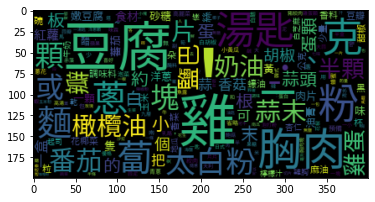

In [319]:
plt.imshow(worldcloud, interpolation='bilinear')

(0.0, 1.0, 0.0, 1.0)

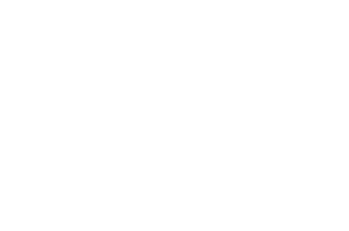

In [300]:
plt.axis('off')

In [34]:
plt.show()

In [ ]:
f = open(r'./test0916.txt',encoding='utf-8')

In [ ]:
print(f.read())

In [37]:
queryArgs = {}
projectFeild = {'url' : True , 'ingredient': True}
search_response = db.recipe_raw.find(queryArgs,projectFeild)

In [38]:
recipe_lst = []
for item in search_response:
    try:
        recipe_lst.append(item['ingredient'])
    except Exception as error_name:
        print(error_name)
        pass

'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'
'ingredient'


In [57]:
ingredient_str = ''
for item in recipe_lst:
    try:
        ingredient_str = ingredient_str + item
    except Exception as error_name:
        print(error_name)
        pass

In [58]:
print(type(ingredient_str))

<class 'str'>


In [9]:
queryArgs = {}
projectField = {'url' : True, 'title' : True, 'time' : True, 'author' : True, 'ingredient' : True, 'stpes' : True, 'comment' : True}
search_response = db.recipe_raw.find(queryArgs, projection=projectField)

print(type(search_response))

result_recipe = []
for n, item in enumerate(search_response):
    result_recipe.append(item)

<class 'pymongo.cursor.Cursor'>


In [10]:
result_recipe

[{'_id': ObjectId('5f58abb2226b5c697d13c9ad'),
  'url': 'https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/13580912-%E5%81%A5%E8%BA%AB%E4%BA%BA-%E9%9B%9E%E8%83%B8%E8%82%89%E4%B8%BC',
  'title': '健身人 雞胸肉丼',
  'time': '2020年09月06日 10:29',
  'author': 'Fish',
  'ingredient': '橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,',
  'comment': '#今天吃這道'},
 {'_id': ObjectId('5f58abbd226b5c697d13c9ae'),
  'url': 'https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/13547262-%E5%81%A5%E8%BA%AB%E4%BA%BA%E7%9A%84%E9%A4%90%E9%BB%9E',
  'title': '健身人的餐點',
  'time': '2020年09月01日 13:57',
  'author': '兒子的媽媽',
  'ingredient': '雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,',
  'comment': '健身也是要吃飽飽的喔'},
 {'_id': ObjectId('5f58abc9226b5c697d13c9af'),
  'url': 'https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/13519162-%E5%81%A5%E8%BA%AB%E4%BA%BA%E9%A4%90%E9%BB%9E',
  'title': '健身人餐點',
  'time': '2020年08月28日 13:46',
  'author': '兒子的媽媽',
  'ingredient': '雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,',
  'comment': ''},
 {'_id': ObjectId('5f58abd6226b5c697d